In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
from scipy import stats
%matplotlib inline

In [2]:
sns.set_context('paper', font_scale=2.5)
sns.set_style('white')


# Import dataset and preprocessing 

In [3]:
os.chdir("../2_Data")
os.getcwd()

'/Users/zhengyuanrui/Decoding_SALT/2_Data'

In [4]:
df1 = pd.read_csv("Exp1_postpro.csv")
df2 = pd.read_csv("Exp2_postpro.csv")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28800 non-null  int64  
 1   gender            28800 non-null  int64  
 2   year              28800 non-null  int64  
 3   education         28800 non-null  int64  
 4   dist              28800 non-null  float64
 5   trial_type        28800 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28800 non-null  object 
 10  correct_response  28800 non-null  object 
 11  correct           28800 non-null  bool   
 12  word              28800 non-null  object 
 13  Image             28800 non-null  object 
 14  shape_en          28800 non-null  object 
 15  valence           28800 non-null  object 
 16  ACC               28800 non-null  int64 

<AxesSubplot: >

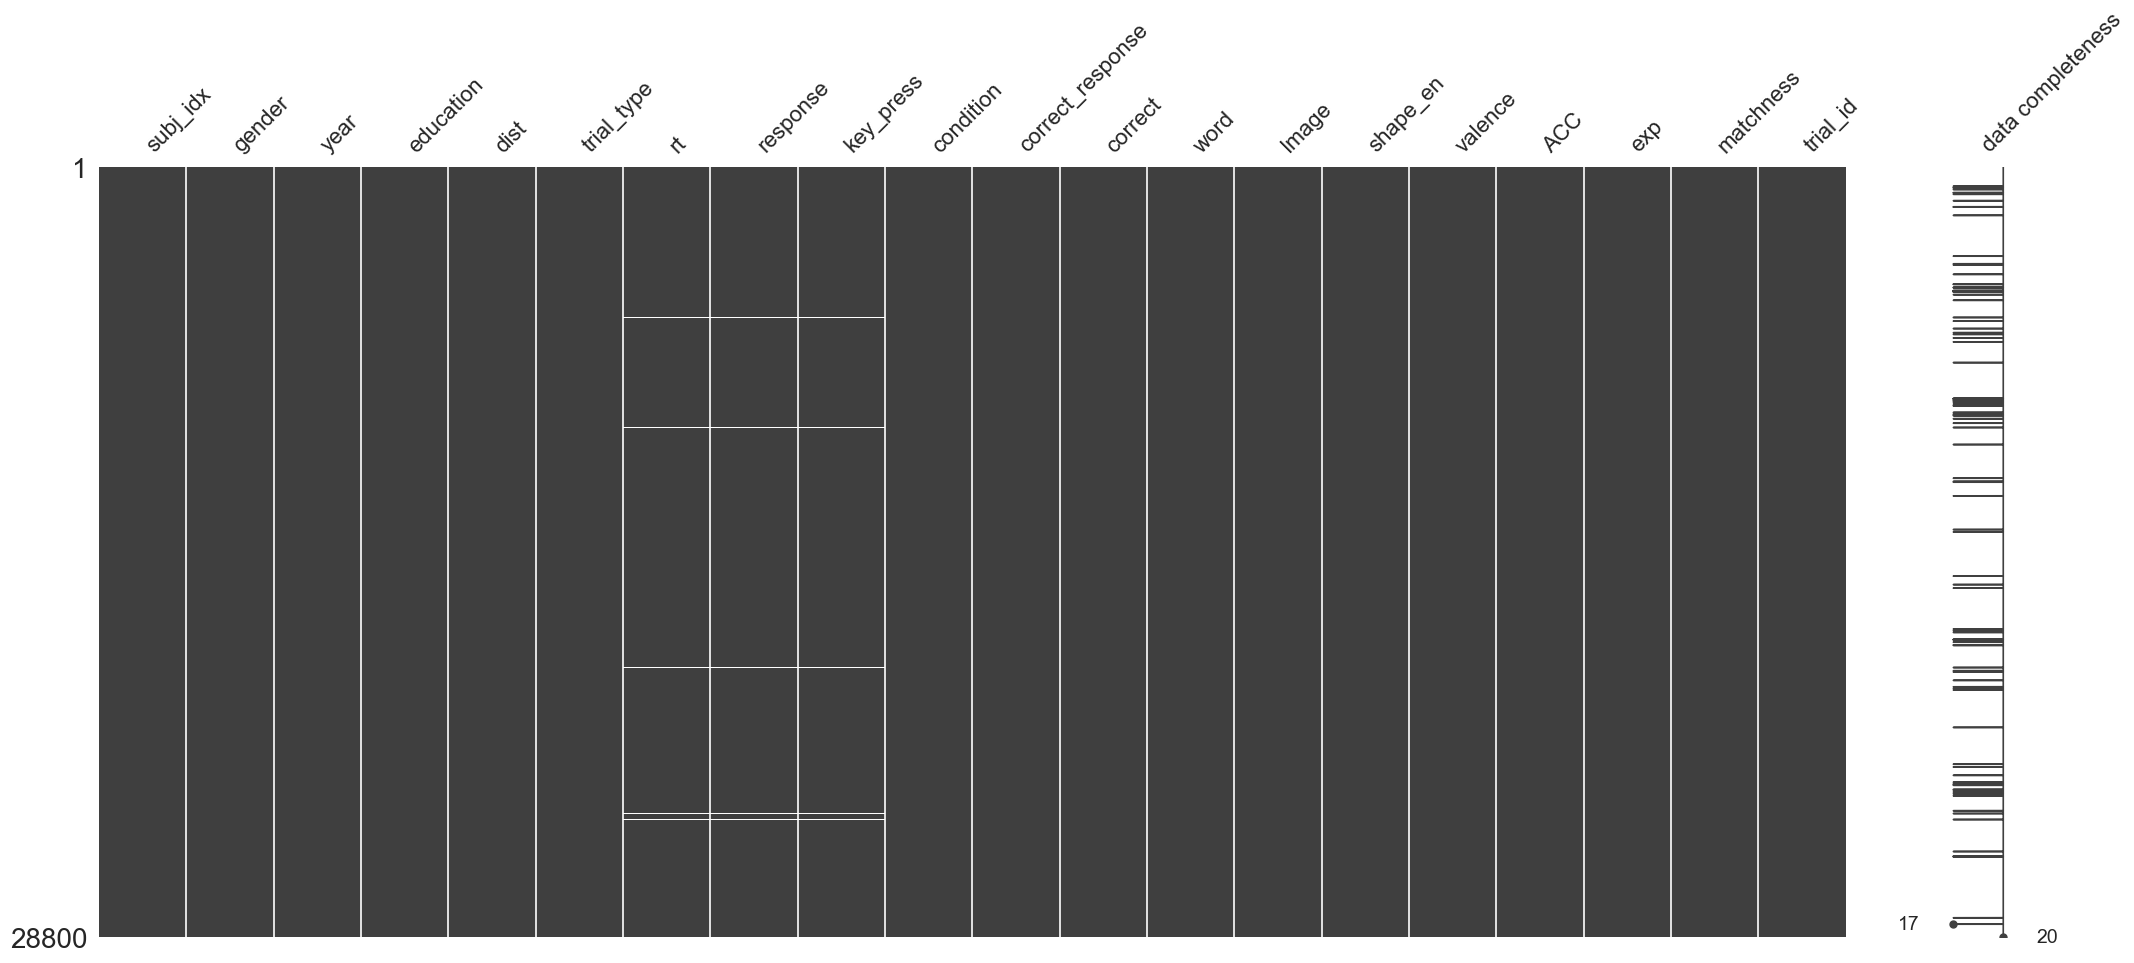

In [6]:
msno.matrix(df1, labels=True)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28800 non-null  int64  
 1   gender            28800 non-null  int64  
 2   year              28800 non-null  int64  
 3   education         28800 non-null  int64  
 4   dist              28800 non-null  float64
 5   trial_type        28800 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28800 non-null  object 
 10  correct_response  28800 non-null  object 
 11  correct           28800 non-null  bool   
 12  word              28800 non-null  object 
 13  Image             28800 non-null  object 
 14  shape_en          28800 non-null  object 
 15  valence           28800 non-null  object 
 16  ACC               28800 non-null  int64 

<AxesSubplot: >

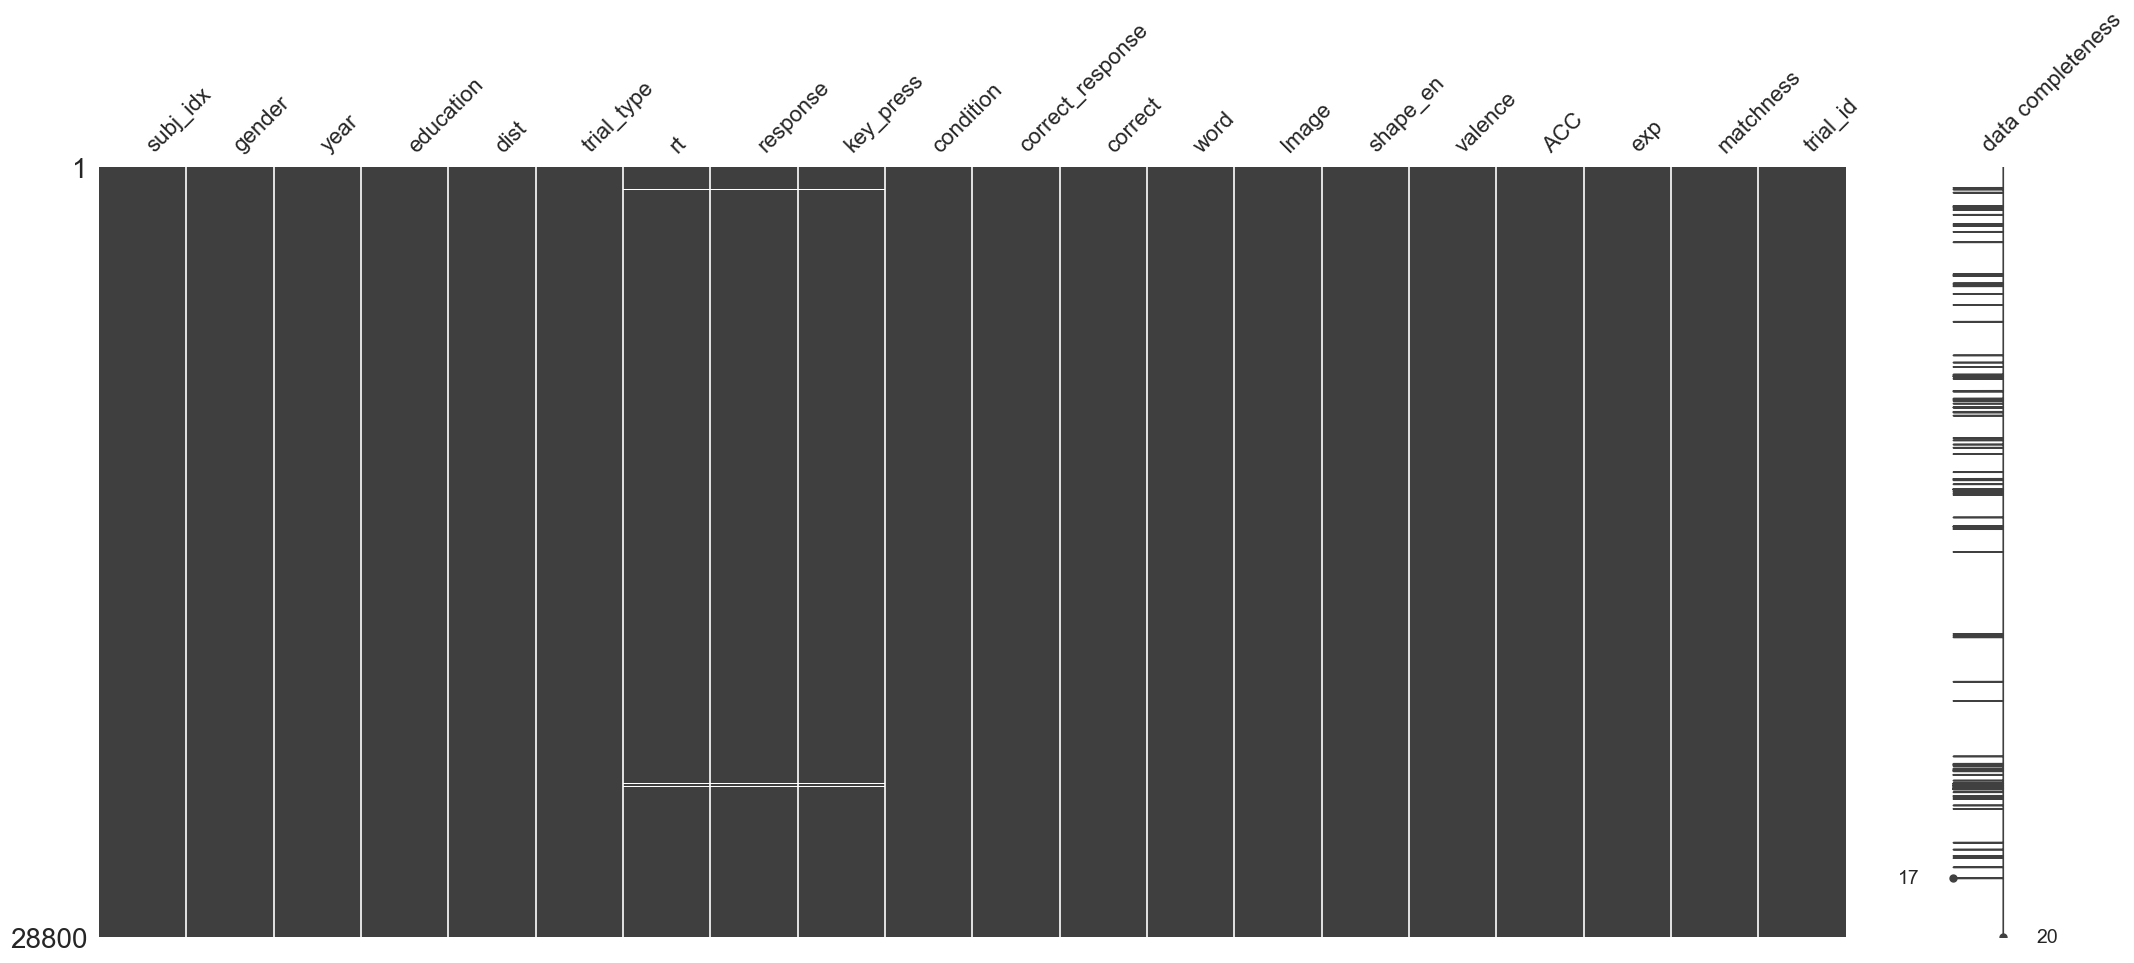

In [8]:
msno.matrix(df2, labels=True)

In [9]:
df1 = df1.dropna()

In [10]:
df1['rt'] = np.log(df1['rt'])

In [11]:
df1['matchness'] = df1['matchness'].map(dict(match=1, mismatch=0))

In [12]:
df1.head()

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,correct_response,correct,word,Image,shape_en,valence,ACC,exp,matchness,trial_id
0,1,0,2000,5,434.97,psychophysics,6.773080,f,f,image_first,f,True,三角,img/C_ambi40.png,circle,triangle,1,exp1,0,1
1,1,0,2000,5,434.97,psychophysics,6.507278,j,j,image_first,j,True,圆形,img/C_ambi40.png,circle,circle,1,exp1,1,2
2,1,0,2000,5,434.97,psychophysics,6.386879,j,j,image_first,j,True,三角,img/T_ambi40.png,triangle,triangle,1,exp1,1,3
3,1,0,2000,5,434.97,psychophysics,6.469250,f,f,image_first,f,True,圆形,img/S_ambi40.png,square,circle,1,exp1,0,4
4,1,0,2000,5,434.97,psychophysics,6.350886,j,j,image_first,j,True,方形,img/S_ambi40.png,square,square,1,exp1,1,5


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28661 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28661 non-null  int64  
 1   gender            28661 non-null  int64  
 2   year              28661 non-null  int64  
 3   education         28661 non-null  int64  
 4   dist              28661 non-null  float64
 5   trial_type        28661 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28661 non-null  object 
 10  correct_response  28661 non-null  object 
 11  correct           28661 non-null  bool   
 12  word              28661 non-null  object 
 13  Image             28661 non-null  object 
 14  shape_en          28661 non-null  object 
 15  valence           28661 non-null  object 
 16  ACC               28661 non-null  int64 

In [14]:
df2 = df2.dropna()

In [15]:
df2['rt'] = np.log(df2['rt'])

In [16]:
df2['matchness'] = df2['matchness'].map(dict(match=1, mismatch=0))

In [17]:
df2.head()

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,correct_response,correct,word,Image,shape_en,valence,ACC,exp,matchness,trial_id
0,1,0,2000,5,408.81,psychophysics,6.711740,f,f,image_first,f,True,常人,img/S_ambi40.png,square,Neutral,1,exp2,0,1
1,1,0,2000,5,408.81,psychophysics,6.608001,f,f,image_first,f,True,好人,img/T_ambi40.png,triangle,Good,1,exp2,0,2
2,1,0,2000,5,408.81,psychophysics,6.660575,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,1,3
3,1,0,2000,5,408.81,psychophysics,6.526495,f,f,image_first,f,True,坏人,img/C_ambi40.png,circle,Bad,1,exp2,0,4
4,1,0,2000,5,408.81,psychophysics,6.395262,j,j,image_first,j,True,常人,img/T_ambi40.png,triangle,Neutral,1,exp2,1,5


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28682 non-null  int64  
 1   gender            28682 non-null  int64  
 2   year              28682 non-null  int64  
 3   education         28682 non-null  int64  
 4   dist              28682 non-null  float64
 5   trial_type        28682 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28682 non-null  object 
 10  correct_response  28682 non-null  object 
 11  correct           28682 non-null  bool   
 12  word              28682 non-null  object 
 13  Image             28682 non-null  object 
 14  shape_en          28682 non-null  object 
 15  valence           28682 non-null  object 
 16  ACC               28682 non-null  int64 

## Onehot Coding

In [19]:
onehot_v1 = pd.get_dummies(df1[["valence"]])

In [20]:
df1 = pd.concat([df1, onehot_v1], axis=1)

In [21]:
onehot_v2 = pd.get_dummies(df2[["valence"]])

In [22]:
df2 = pd.concat([df2, onehot_v2], axis=1)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28661 entries, 0 to 28799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28661 non-null  int64  
 1   gender            28661 non-null  int64  
 2   year              28661 non-null  int64  
 3   education         28661 non-null  int64  
 4   dist              28661 non-null  float64
 5   trial_type        28661 non-null  object 
 6   rt                28661 non-null  float64
 7   response          28661 non-null  object 
 8   key_press         28661 non-null  object 
 9   condition         28661 non-null  object 
 10  correct_response  28661 non-null  object 
 11  correct           28661 non-null  bool   
 12  word              28661 non-null  object 
 13  Image             28661 non-null  object 
 14  shape_en          28661 non-null  object 
 15  valence           28661 non-null  object 
 16  ACC               28661 non-null  int64 

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28682 entries, 0 to 28799
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          28682 non-null  int64  
 1   gender            28682 non-null  int64  
 2   year              28682 non-null  int64  
 3   education         28682 non-null  int64  
 4   dist              28682 non-null  float64
 5   trial_type        28682 non-null  object 
 6   rt                28682 non-null  float64
 7   response          28682 non-null  object 
 8   key_press         28682 non-null  object 
 9   condition         28682 non-null  object 
 10  correct_response  28682 non-null  object 
 11  correct           28682 non-null  bool   
 12  word              28682 non-null  object 
 13  Image             28682 non-null  object 
 14  shape_en          28682 non-null  object 
 15  valence           28682 non-null  object 
 16  ACC               28682 non-null  int64 

## Split the data by condition

In [25]:
df1_sim = df1[df1.condition == "simultaneous"]
df1_word = df1[df1.condition == "word_first"]
df1_img = df1[df1.condition == "image_first"]

df2_sim = df2[df2.condition == "simultaneous"]
df2_word = df2[df2.condition == "word_first"]
df2_img = df2[df2.condition == "image_first"]

In [26]:
y1_sim = df1_sim["matchness"].values
y1_word = df1_word["matchness"].values
y1_img = df1_img["matchness"].values

y2_sim = df2_sim["matchness"].values
y2_word = df2_word["matchness"].values
y2_img = df2_img["matchness"].values

In [27]:
X1_sim = df1_sim[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_word = df1_word[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values
X1_img = df1_img[['rt', "ACC", "valence_circle", "valence_triangle", "valence_square"]].values

X2_sim = df2_sim[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_word = df2_word[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values
X2_img = df2_img[['rt', "ACC", "valence_Neutral", "valence_Bad", "valence_Good"]].values

# within sub, cross condition

## Exp1

In [28]:
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values

In [30]:
def lr_Cross(X_source, y_source, source_groups,source_name, X_target1, y_target1, target1_groups, target_name1, X_target2, y_target2, target2_gorups, target_name2, fold):
    df_result = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
    for sub in np.unique(source_groups):
        idx_sub = source_groups == sub
        feature_sub_source = X_source[idx_sub]
        label_sub_source = y_source[idx_sub]
        cv = StratifiedShuffleSplit(n_splits=fold, test_size=0.2, random_state=1)#n_split要很大
        logi = make_pipeline(
        StandardScaler(), 
        LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
        score = cross_validate(logi, feature_sub_source, label_sub_source, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)

        estimators = score["estimator"]

        for ii, s in enumerate(score["test_score"]):
            df_result["sub"].append(sub)
            df_result["score"].append(s)
            df_result["fold"].append(ii)
            df_result["source"].append(source_name)
            df_result["target"].append(source_name)
        
        for ii, estimator in enumerate(estimators):
            y_true_t1 = y_target1[target1_groups == sub]
            
            y_pred_t1 = estimator.predict_proba(X_target1[target1_groups == sub])
            roc_t1 = roc_auc_score(y_true_t1, y_pred_t1[:, -1])

            df_result["sub"].append(sub)  
            df_result["score"].append(roc_t1)
            df_result["fold"].append(ii)
            df_result["source"].append(source_name)
            df_result["target"].append(target_name1)

            y_true_t2 = y_target2[target2_gorups == sub]
            y_pred_t2 = estimator.predict_proba(X_target2[target2_gorups==sub])

            roc_t2 = roc_auc_score(y_true_t2, y_pred_t2[:, -1])

            df_result["sub"].append(sub)  
            df_result["score"].append(roc_t2)
            df_result["fold"].append(ii)
            df_result["source"].append(source_name)
            df_result["target"].append(target_name2)



    return pd.DataFrame(df_result) 


In [31]:
df1_si = lr_Cross(X_source = X1_img, y_source = y1_img, source_groups = groups1_img, source_name = "Image_first", X_target1 = X1_word, y_target1 = y1_word, target1_groups = groups1_word, target_name1 = "Word_first", X_target2 = X1_sim, y_target2 = y1_sim, target2_gorups = groups1_sim, target_name2 = "Simultaneous", fold = 300)

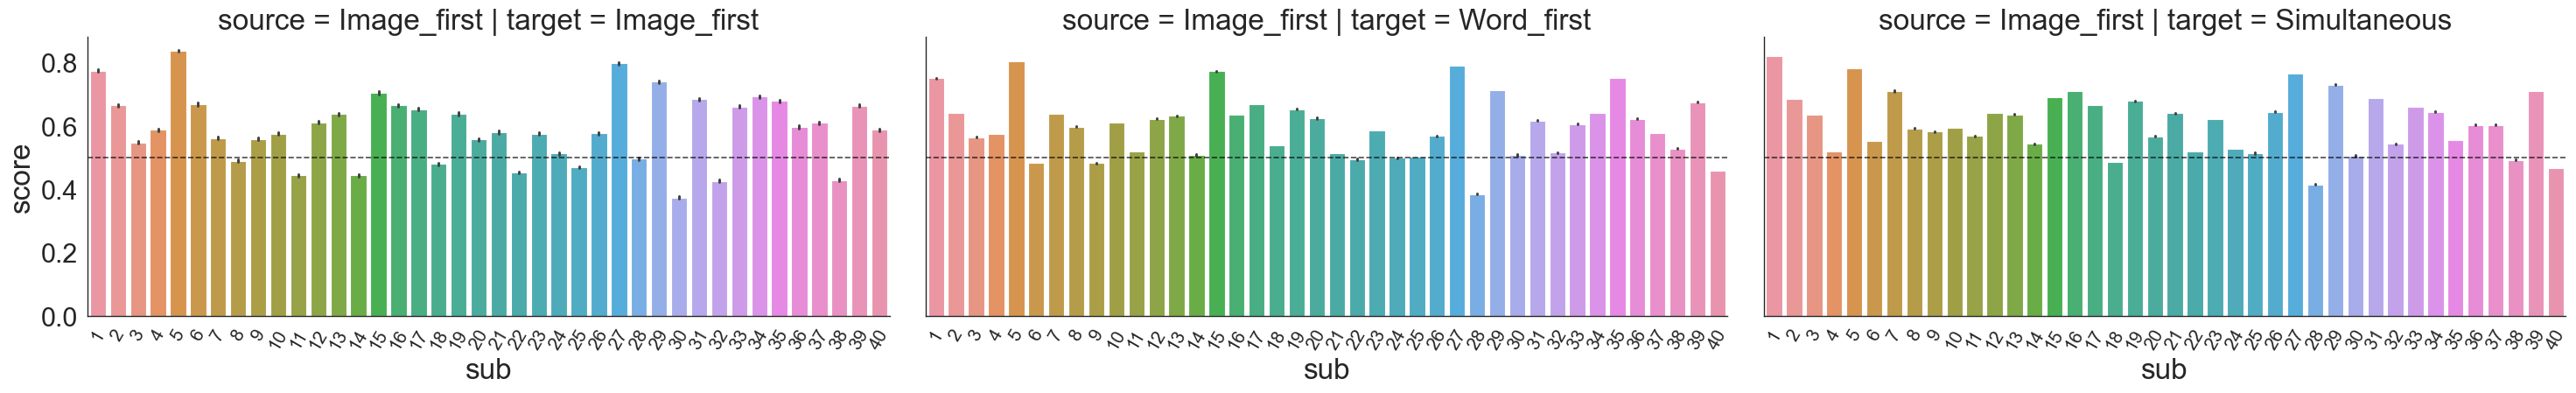

In [32]:
t1 = sns.catplot(x="sub", y="score", data=df1_si, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(t1.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in t1.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in t1.axes.flatten()]
plt.savefig("barplot_testfun.png",dpi=300)

### Image_first as source

In [95]:
df_result_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_w)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Word_first")
        
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Simultaneous")

df_result_si=pd.DataFrame(df_result_si)  

In [96]:
df_result_si

,sub,score,fold,source,target
0,1,0.792535,0,Image_first,Image_first
1,1,0.724826,1,Image_first,Image_first
2,1,0.833333,2,Image_first,Image_first
3,1,0.756076,3,Image_first,Image_first
4,1,0.572917,4,Image_first,Image_first
...,...,...,...,...,...
35995,40,0.467917,297,Image_first,Simultaneous
35996,40,0.453507,298,Image_first,Word_first
35997,40,0.472361,298,Image_first,Simultaneous
35998,40,0.459896,299,Image_first,Word_first


### Word_first as source

In [97]:
df_result_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Simultaneous")
        
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_i)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Image_first")

df_result_sw=pd.DataFrame(df_result_sw) 

In [98]:
df_result_sw

,sub,score,fold,source,target
0,1,0.791667,0,Word_first,Word_first
1,1,0.671007,1,Word_first,Word_first
2,1,0.731771,2,Word_first,Word_first
3,1,0.663194,3,Word_first,Word_first
4,1,0.720486,4,Word_first,Word_first
...,...,...,...,...,...
35995,40,0.535417,297,Word_first,Image_first
35996,40,0.540694,298,Word_first,Simultaneous
35997,40,0.580972,298,Word_first,Image_first
35998,40,0.544306,299,Word_first,Simultaneous


### Simultaneous as source

In [99]:
df_result_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(s)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_i)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Image_first")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_w)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Word_first")

df_result_ss=pd.DataFrame(df_result_ss) 

In [100]:
df_result1 = pd.concat([df_result_ss, df_result_si, df_result_sw])
df_result1.to_csv('result1_cross_con.csv')

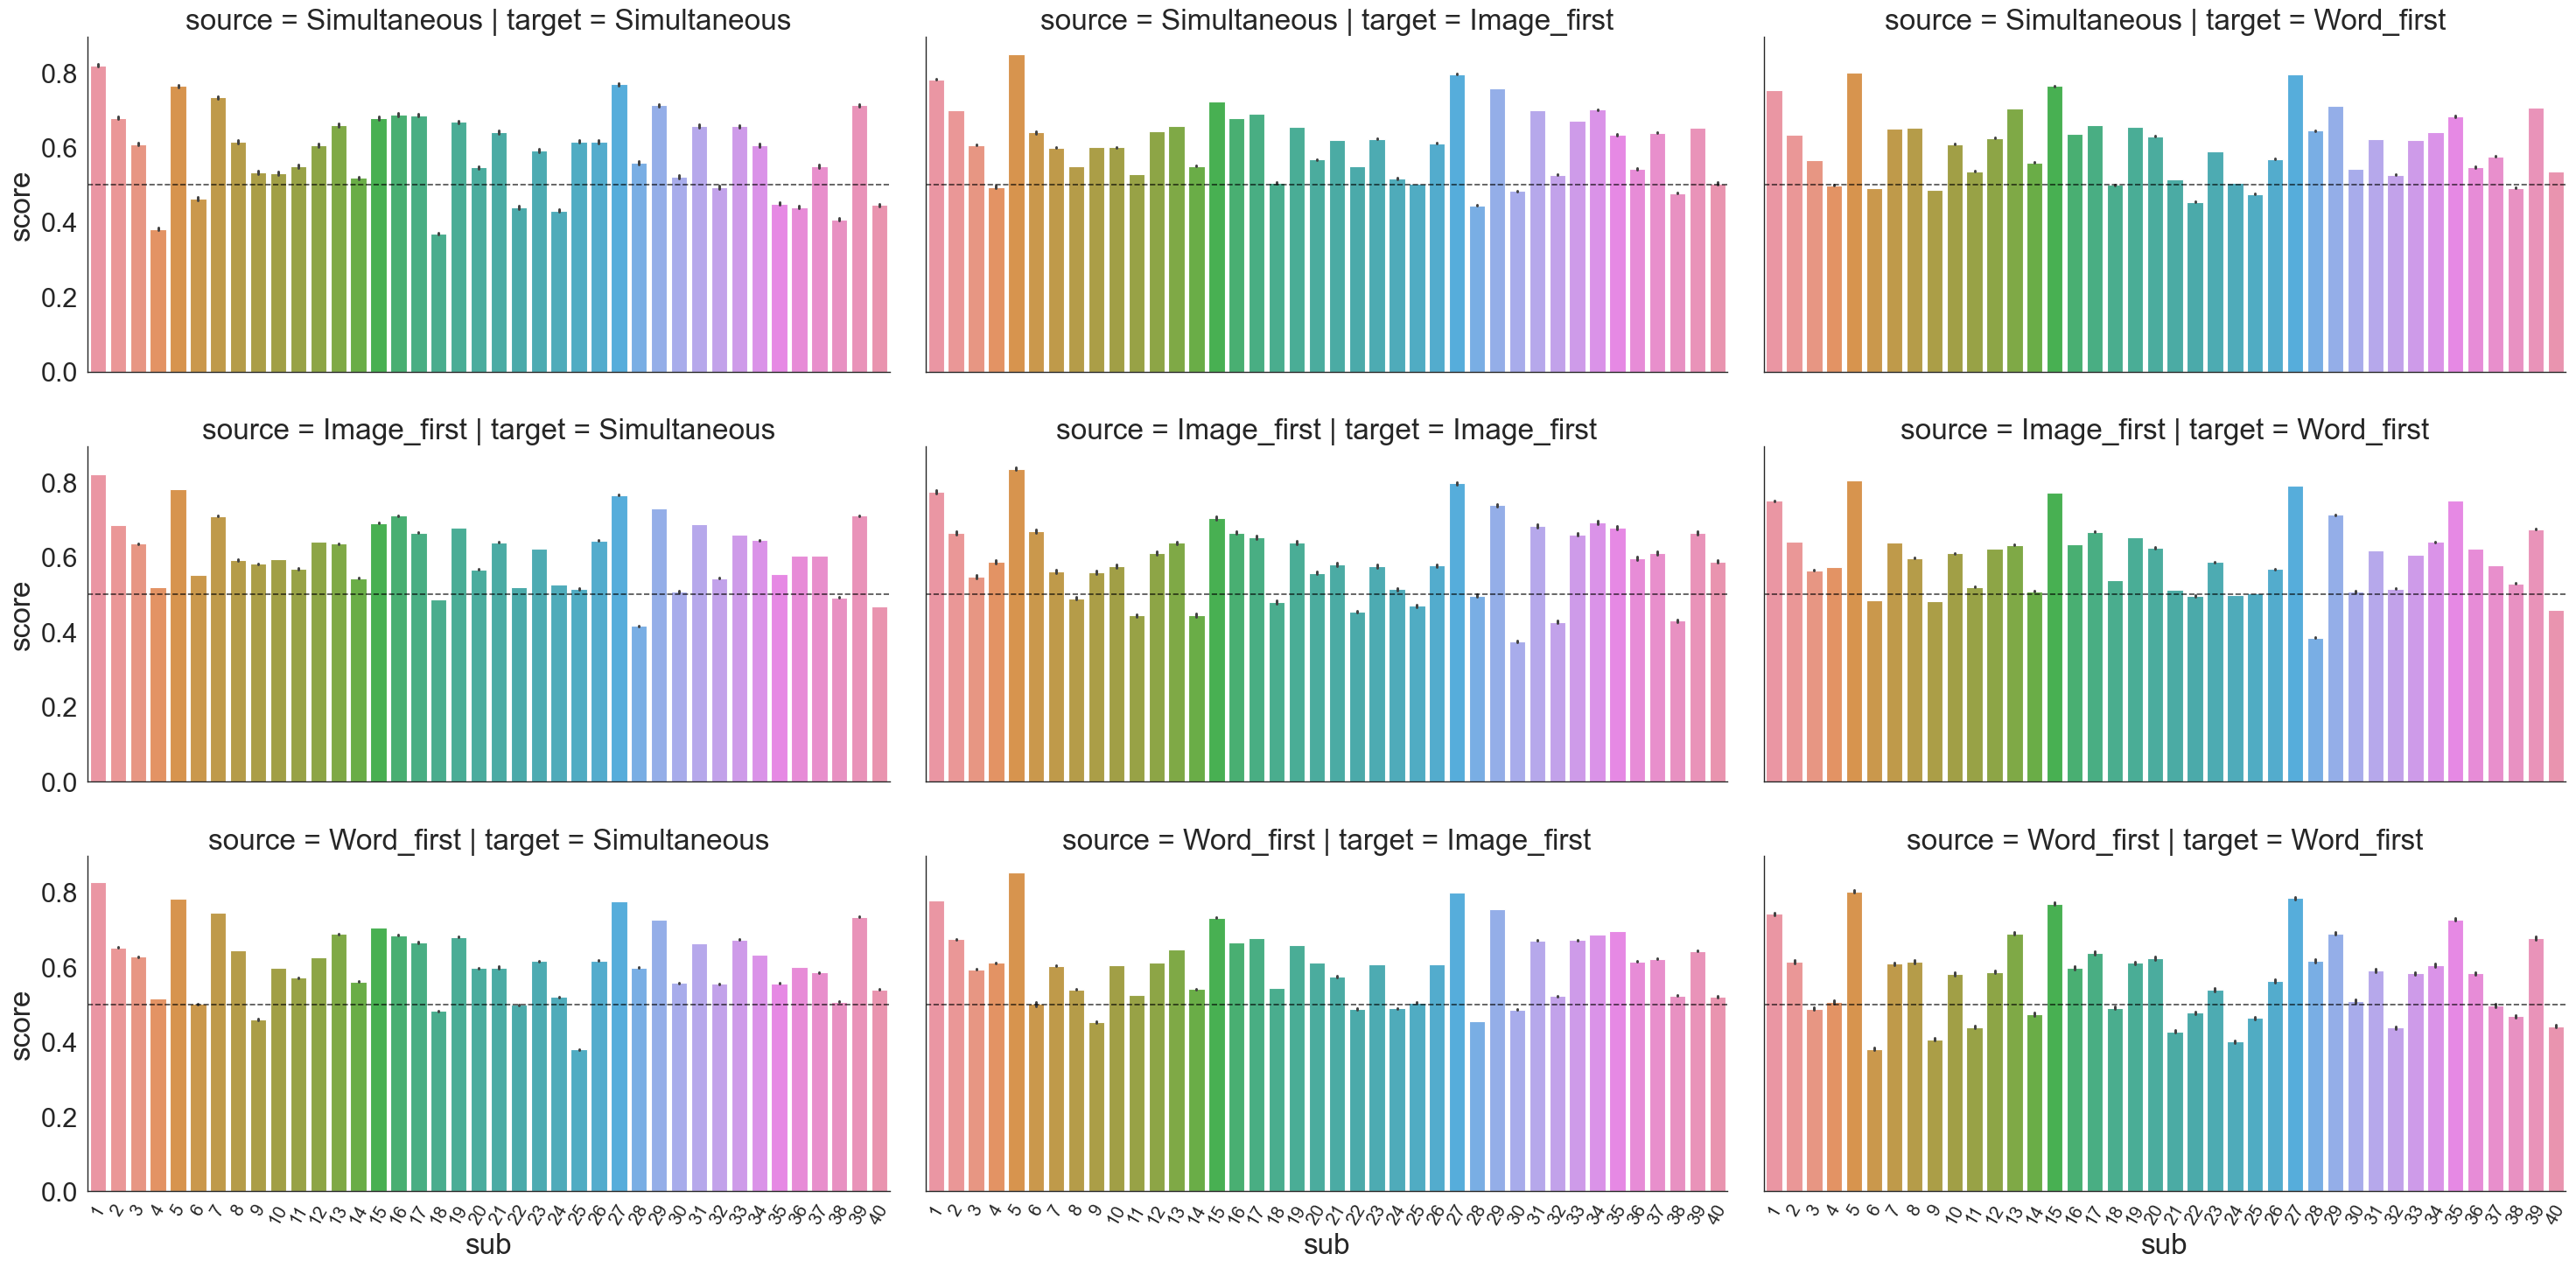

In [101]:
r1 = sns.catplot(x="sub", y="score", data=df_result1, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r1.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r1.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r1.axes.flatten()]
plt.savefig("barplot_cro_con.png",dpi=300)

## Exp2

In [36]:
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values

### Image_first as source

In [37]:
df_result2_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_w)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Word_first")
        
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Simultaneous")

df_result2_si=pd.DataFrame(df_result2_si)  

In [38]:
df_result2_si

,sub,score,fold,source,target
0,1,0.809896,0,Image_first,Image_first
1,1,0.822049,1,Image_first,Image_first
2,1,0.787326,2,Image_first,Image_first
3,1,0.693576,3,Image_first,Image_first
4,1,0.685764,4,Image_first,Image_first
...,...,...,...,...,...
35995,40,0.575868,297,Image_first,Simultaneous
35996,40,0.500139,298,Image_first,Word_first
35997,40,0.574410,298,Image_first,Simultaneous
35998,40,0.484931,299,Image_first,Word_first


### Word_first as source

In [39]:
df_result2_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Simultaneous")
        
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_i)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Image_first")

df_result2_sw=pd.DataFrame(df_result2_sw) 

In [40]:
df_result2_sw

,sub,score,fold,source,target
0,1,0.773438,0,Word_first,Word_first
1,1,0.753472,1,Word_first,Word_first
2,1,0.750000,2,Word_first,Word_first
3,1,0.819444,3,Word_first,Word_first
4,1,0.800347,4,Word_first,Word_first
...,...,...,...,...,...
35995,40,0.468542,297,Word_first,Image_first
35996,40,0.480938,298,Word_first,Simultaneous
35997,40,0.446181,298,Word_first,Image_first
35998,40,0.487535,299,Word_first,Simultaneous


### Simultaneous as source

In [41]:
df_result2_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(s)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_i)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Image_first")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_w)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Word_first")

df_result2_ss=pd.DataFrame(df_result2_ss) 

In [42]:
df_result2_ss

,sub,score,fold,source,target
0,1,0.819444,0,Simultaneous,Simultaneous
1,1,0.784722,1,Simultaneous,Simultaneous
2,1,0.758681,2,Simultaneous,Simultaneous
3,1,0.784722,3,Simultaneous,Simultaneous
4,1,0.756076,4,Simultaneous,Simultaneous
...,...,...,...,...,...
35995,40,0.496250,297,Simultaneous,Word_first
35996,40,0.614653,298,Simultaneous,Image_first
35997,40,0.493472,298,Simultaneous,Word_first
35998,40,0.606875,299,Simultaneous,Image_first


In [43]:
df_result2 = pd.concat([df_result2_si, df_result2_ss, df_result2_sw])

In [44]:
df_result2.to_csv('result2_cross_con.csv')

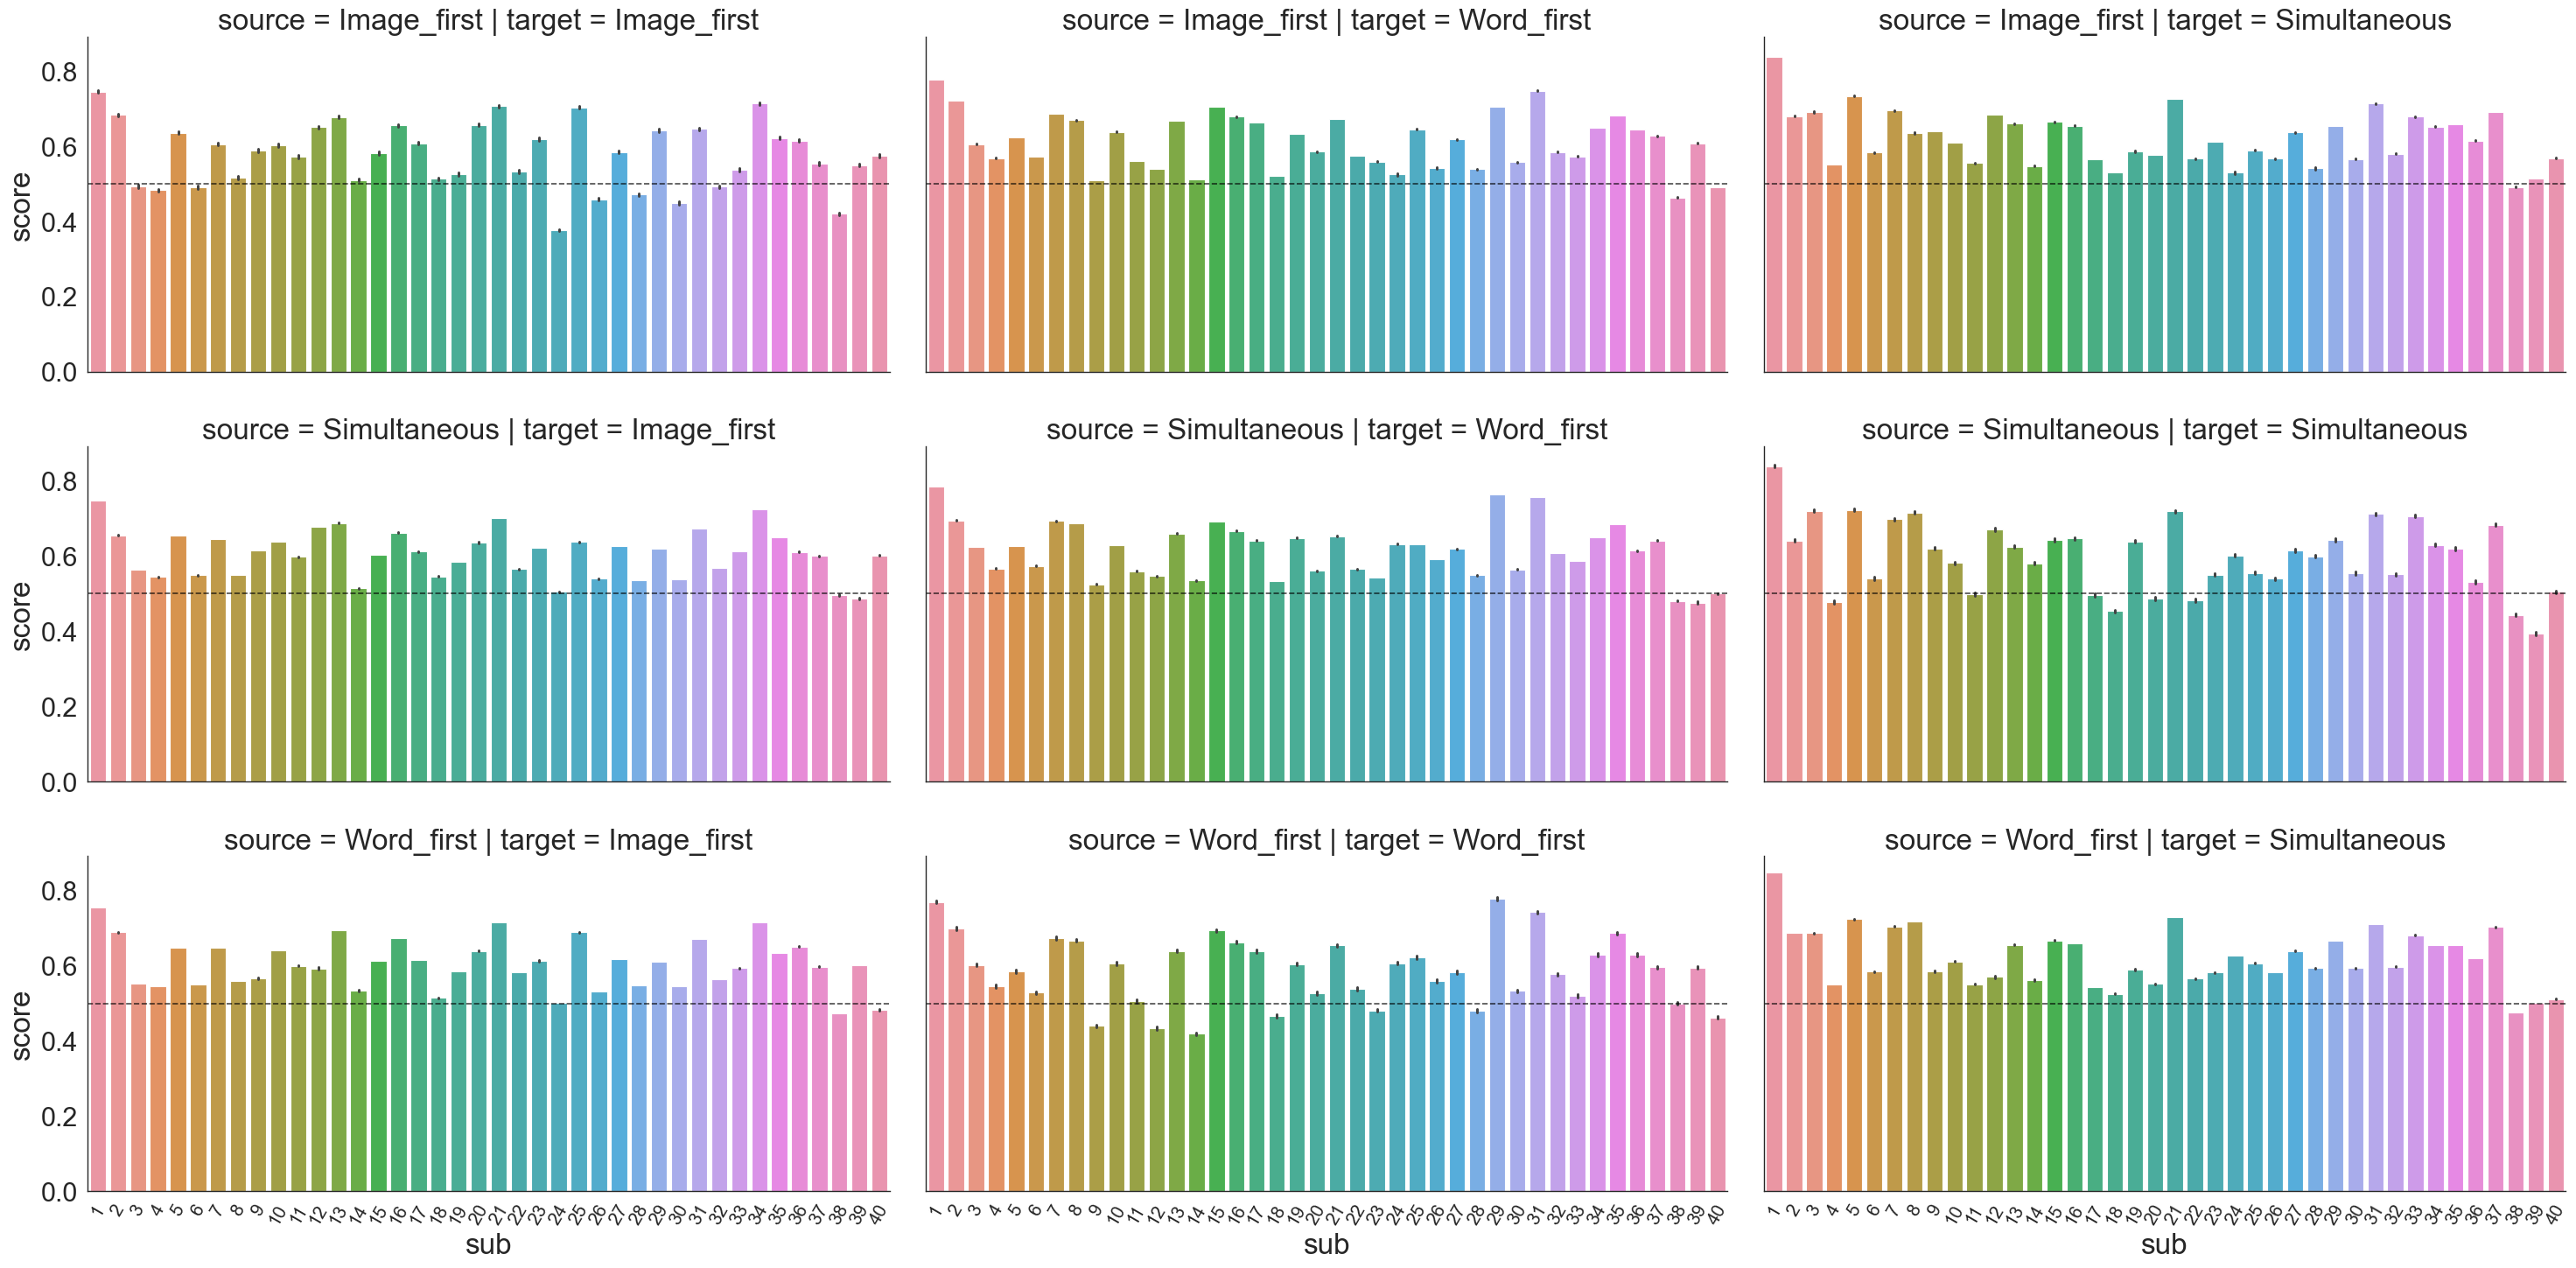

In [45]:
r2 = sns.catplot(x="sub", y="score", data=df_result2, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r2.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r2.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r2.axes.flatten()]
plt.savefig("barplot_cro_con2.png",dpi=300)

# within sub, cross condition and cross experiment

## simultaneous as source, exp1- → exp2

In [46]:
groups1_sim = df1_sim["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [47]:
df_croexp12_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_i)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Image_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_w)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Word_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_s)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Simultaneous")
        df_croexp12_ss["experiment"].append("exp1 → exp2")


df_croexp12_ss=pd.DataFrame(df_croexp12_ss) 

In [48]:
df_croexp12_ss

,sub,score,fold,source,target,experiment
0,1,0.754514,0,Simultaneous,Image_first,exp1 → exp2
1,1,0.777604,0,Simultaneous,Word_first,exp1 → exp2
2,1,0.848542,0,Simultaneous,Simultaneous,exp1 → exp2
3,1,0.729236,1,Simultaneous,Image_first,exp1 → exp2
4,1,0.756632,1,Simultaneous,Word_first,exp1 → exp2
...,...,...,...,...,...,...
35995,40,0.523056,298,Simultaneous,Word_first,exp1 → exp2
35996,40,0.559479,298,Simultaneous,Simultaneous,exp1 → exp2
35997,40,0.577083,299,Simultaneous,Image_first,exp1 → exp2
35998,40,0.548611,299,Simultaneous,Word_first,exp1 → exp2


### Word_first as source, exp1 → exp2

In [49]:
groups1_word = df1_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [50]:
df_croexp12_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_i)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Image_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_w)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Word_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_s)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Simultaneous")
        df_croexp12_sw["experiment"].append("exp1 → exp2")


df_croexp12_sw=pd.DataFrame(df_croexp12_sw) 

In [51]:
df_croexp12_sw

,sub,score,fold,source,target,experiment
0,1,0.733194,0,Word_first,Image_first,exp1 → exp2
1,1,0.771354,0,Word_first,Word_first,exp1 → exp2
2,1,0.832014,0,Word_first,Simultaneous,exp1 → exp2
3,1,0.746736,1,Word_first,Image_first,exp1 → exp2
4,1,0.761979,1,Word_first,Word_first,exp1 → exp2
...,...,...,...,...,...,...
35995,40,0.503542,298,Word_first,Word_first,exp1 → exp2
35996,40,0.577257,298,Word_first,Simultaneous,exp1 → exp2
35997,40,0.558125,299,Word_first,Image_first,exp1 → exp2
35998,40,0.527639,299,Word_first,Word_first,exp1 → exp2


### Image_first as source, exp1 → exp2

In [52]:
groups1_img = df1_img["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [53]:
df_croexp12_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_i)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Image_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_w)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Word_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_s)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Simultaneous")
        df_croexp12_si["experiment"].append("exp1 → exp2")


df_croexp12_si=pd.DataFrame(df_croexp12_si) 

In [54]:
df_croexp12_si

,sub,score,fold,source,target,experiment
0,1,0.751806,0,Image_first,Image_first,exp1 → exp2
1,1,0.775035,0,Image_first,Word_first,exp1 → exp2
2,1,0.828681,0,Image_first,Simultaneous,exp1 → exp2
3,1,0.742569,1,Image_first,Image_first,exp1 → exp2
4,1,0.767118,1,Image_first,Word_first,exp1 → exp2
...,...,...,...,...,...,...
35995,40,0.439583,298,Image_first,Word_first,exp1 → exp2
35996,40,0.521285,298,Image_first,Simultaneous,exp1 → exp2
35997,40,0.565208,299,Image_first,Image_first,exp1 → exp2
35998,40,0.444236,299,Image_first,Word_first,exp1 → exp2


### Simultaneous as source, exp2 → exp1

In [55]:
groups2_sim = df2_sim["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [56]:
df_croexp21_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_i)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Image_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_w)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Word_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_s)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Simultaneous")
        df_croexp21_ss["experiment"].append("exp2 → exp1")


df_croexp21_ss=pd.DataFrame(df_croexp21_ss) 

In [57]:
df_croexp21_ss

,sub,score,fold,source,target,experiment
0,1,0.746042,0,Simultaneous,Image_first,exp2 → exp1
1,1,0.744792,0,Simultaneous,Word_first,exp2 → exp1
2,1,0.802153,0,Simultaneous,Simultaneous,exp2 → exp1
3,1,0.754792,1,Simultaneous,Image_first,exp2 → exp1
4,1,0.749167,1,Simultaneous,Word_first,exp2 → exp1
...,...,...,...,...,...,...
35995,40,0.527604,298,Simultaneous,Word_first,exp2 → exp1
35996,40,0.544028,298,Simultaneous,Simultaneous,exp2 → exp1
35997,40,0.592083,299,Simultaneous,Image_first,exp2 → exp1
35998,40,0.525174,299,Simultaneous,Word_first,exp2 → exp1


### Word_first as source, exp2 → exp1

In [58]:
groups2_word = df2_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [59]:
df_croexp21_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_i)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Image_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_w)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Word_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_s)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Simultaneous")
        df_croexp21_sw["experiment"].append("exp2 → exp1")


df_croexp21_sw=pd.DataFrame(df_croexp21_sw) 

In [60]:
df_croexp21_sw

,sub,score,fold,source,target,experiment
0,1,0.766667,0,Word_first,Image_first,exp2 → exp1
1,1,0.757431,0,Word_first,Word_first,exp2 → exp1
2,1,0.828646,0,Word_first,Simultaneous,exp2 → exp1
3,1,0.762639,1,Word_first,Image_first,exp2 → exp1
4,1,0.744097,1,Word_first,Word_first,exp2 → exp1
...,...,...,...,...,...,...
35995,40,0.538854,298,Word_first,Word_first,exp2 → exp1
35996,40,0.527778,298,Word_first,Simultaneous,exp2 → exp1
35997,40,0.452361,299,Word_first,Image_first,exp2 → exp1
35998,40,0.524549,299,Word_first,Word_first,exp2 → exp1


### Image_first as source, exp2 → exp1

In [61]:
groups2_img = df2_img["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [62]:
df_croexp21_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_i)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Image_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_w)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Word_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_s)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Simultaneous")
        df_croexp21_si["experiment"].append("exp2 → exp1")


df_croexp21_si=pd.DataFrame(df_croexp21_si) 

In [63]:
df_croexp21_si

,sub,score,fold,source,target,experiment
0,1,0.789861,0,Image_first,Image_first,exp2 → exp1
1,1,0.736389,0,Image_first,Word_first,exp2 → exp1
2,1,0.805556,0,Image_first,Simultaneous,exp2 → exp1
3,1,0.756875,1,Image_first,Image_first,exp2 → exp1
4,1,0.733194,1,Image_first,Word_first,exp2 → exp1
...,...,...,...,...,...,...
35995,40,0.536285,298,Image_first,Word_first,exp2 → exp1
35996,40,0.540278,298,Image_first,Simultaneous,exp2 → exp1
35997,40,0.583056,299,Image_first,Image_first,exp2 → exp1
35998,40,0.519410,299,Image_first,Word_first,exp2 → exp1


In [64]:
df_cro = pd.concat([df_croexp12_si, df_croexp12_ss, df_croexp12_sw, df_croexp21_si, df_croexp21_ss, df_croexp21_sw])

In [65]:
df_cro.to_csv("Cross_Exp.csv")

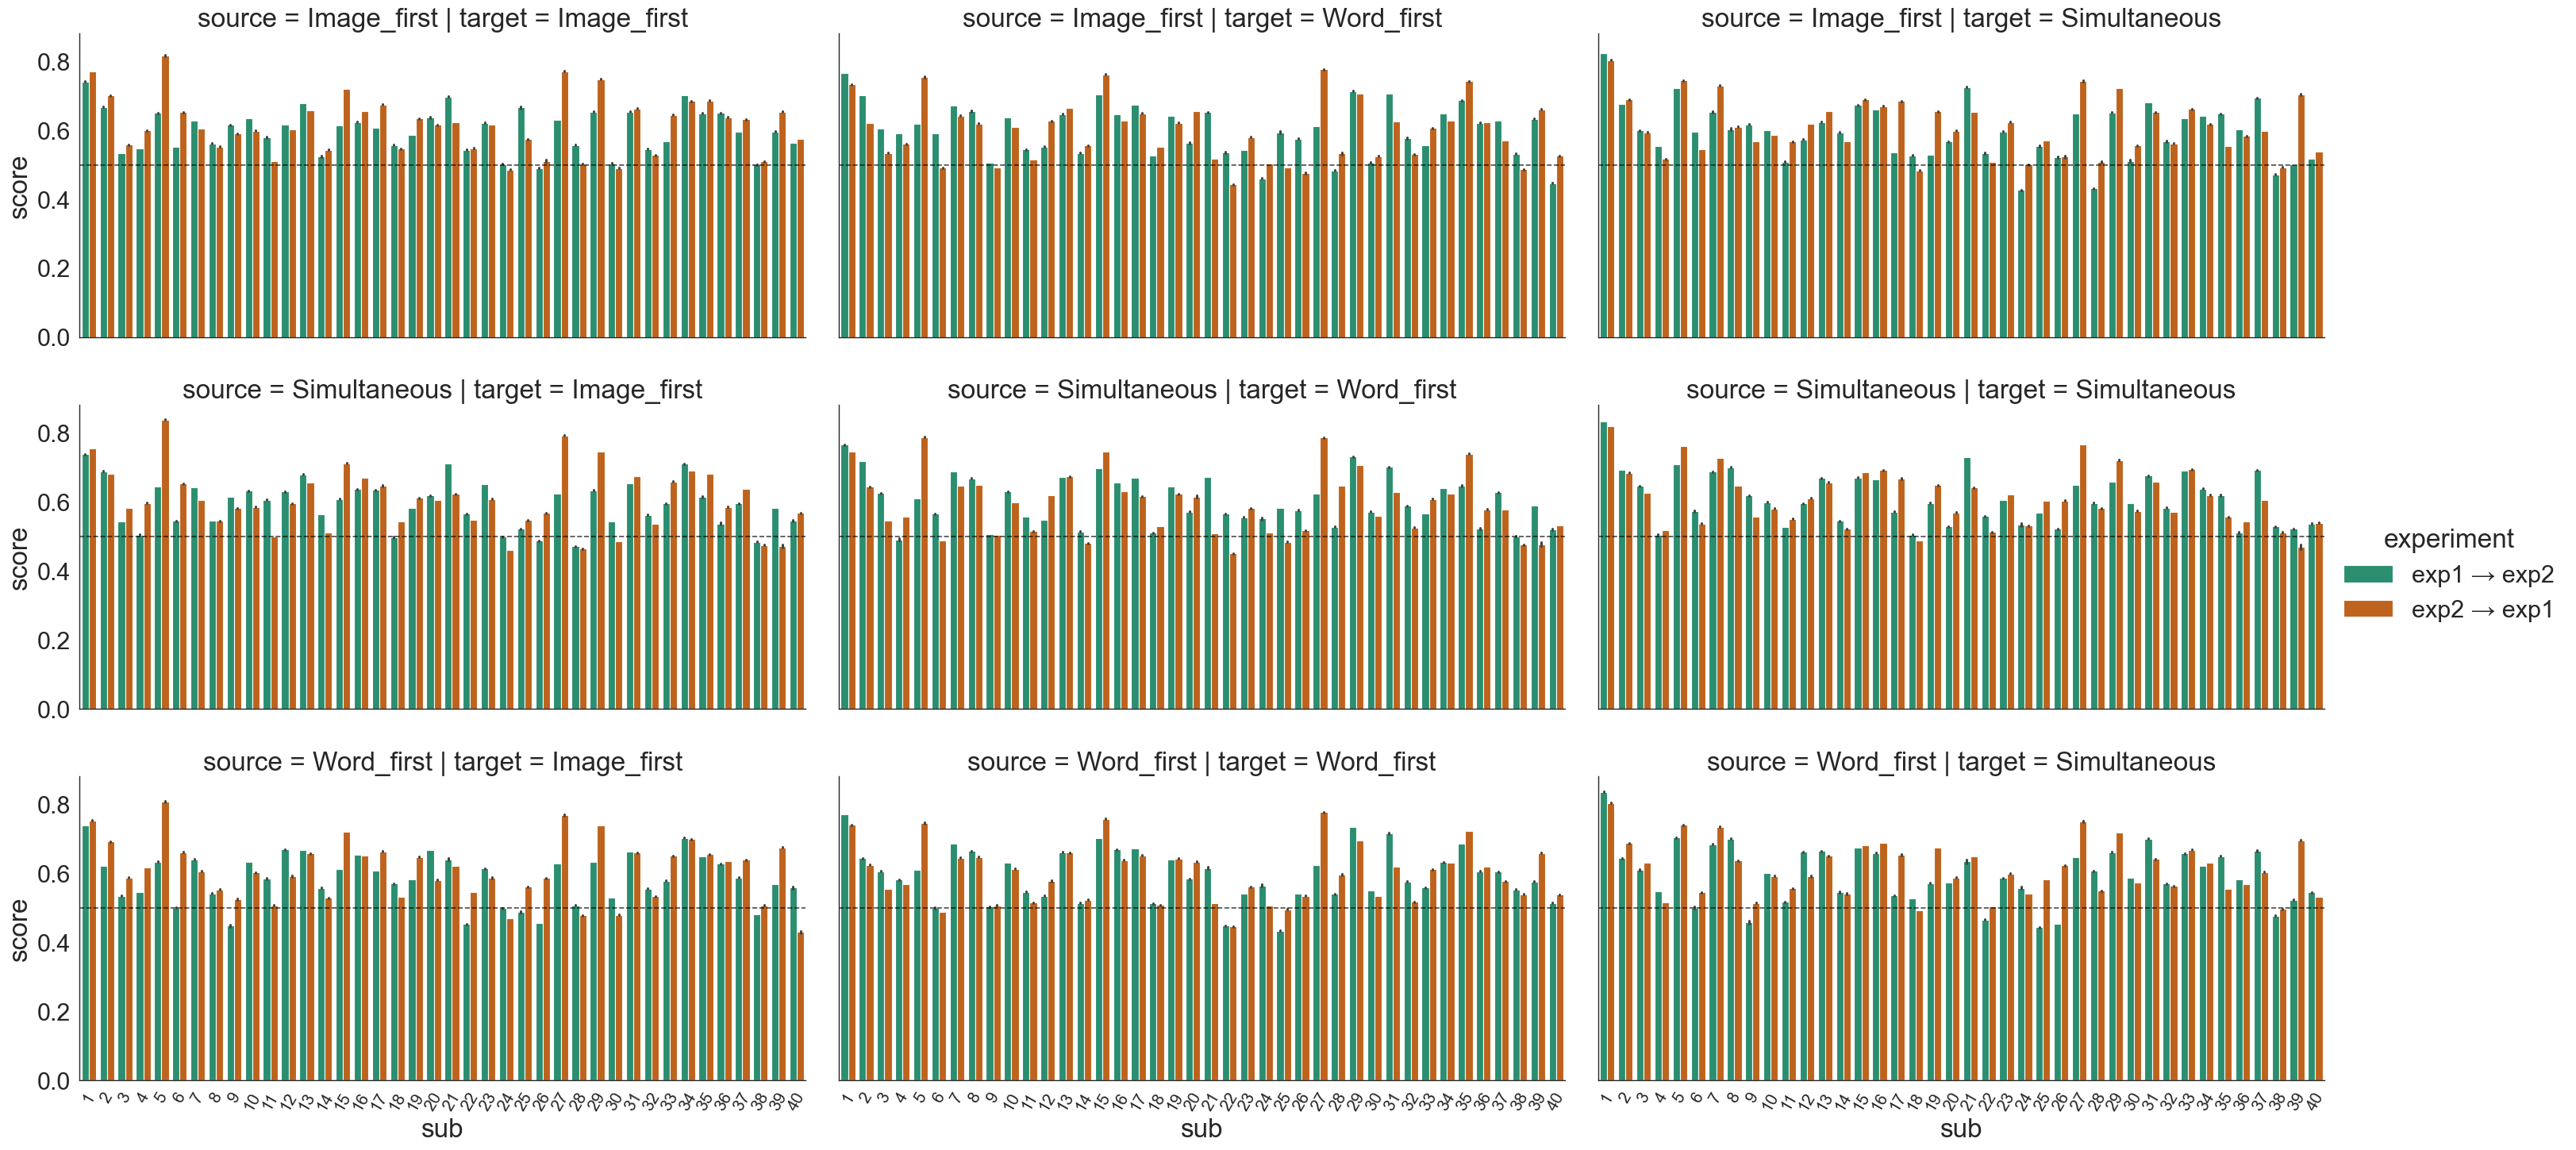

In [66]:
f_cro = sns.catplot(x="sub", y="score", data=df_cro, row="source", col="target", aspect=2, kind="bar", hue="experiment", errorbar="se", palette=sns.color_palette("Dark2"))
xtick_order = list(f_cro.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in f_cro.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in f_cro.axes.flatten()]
plt.savefig("barplot_cro_exp.png",dpi=300)